1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

2. Import Data

In [3]:
# Create Path to Main Project Folder
path = r'/Users/seema/Documents/CareerFoundry/A6/Data Project'

In [4]:
df_happiness = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'happiness_cleaned.csv'), index_col = False)

3. Clean Data

In [5]:
df_happiness.head()

,Unnamed: 0,Rank,Country,Score,GDP Per Capita,Social Support,Life Expectancy,Freedom,Generosity,Perception of Corruption
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
df_happiness.shape

(156, 10)

In [7]:
# Drop Unnecessary Columns
happiness_subset = df_happiness.drop(['Unnamed: 0'], axis = 1)

In [9]:
happiness_subset.shape

(156, 9)

In [11]:
happiness_subset.describe()
# No Extreme Values

,Rank,Score,GDP Per Capita,Social Support,Life Expectancy,Freedom,Generosity,Perception of Corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [12]:
# Change Variable Type
happiness_subset['Rank'] = happiness_subset['Rank'].astype('int64')

In [13]:
# Check Missing Values
happiness_subset.isnull().sum()

Rank                        0
Country                     0
Score                       0
GDP Per Capita              0
Social Support              0
Life Expectancy             0
Freedom                     0
Generosity                  0
Perception of Corruption    0
dtype: int64

In [14]:
# Check Duplicates
dups = happiness_subset.duplicated()
dups.shape # No Duplicates

(156,)

4. Create Scatterplots

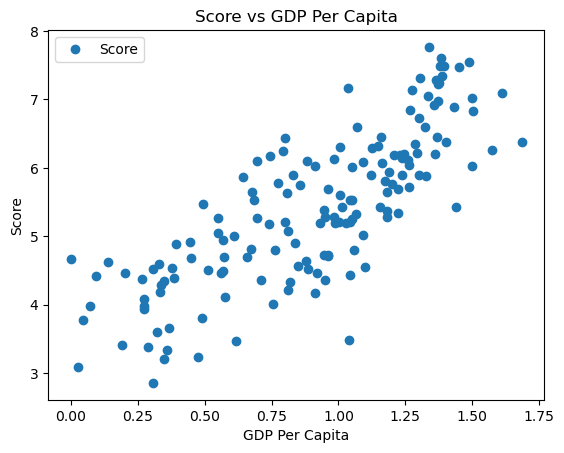

In [15]:
# Create Scatterplot Score vs GDP Per Capita
happiness_subset.plot(x = 'GDP Per Capita', y='Score',style='o')
plt.title('Score vs GDP Per Capita')  
plt.xlabel('GDP Per Capita')  
plt.ylabel('Score')  
plt.show()

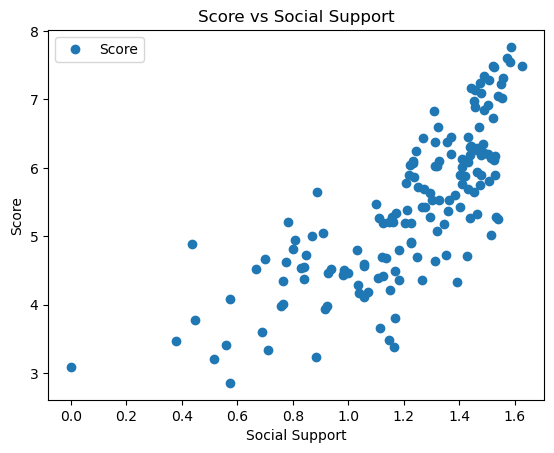

In [16]:
# Create Scatterplot Score vs Social Support
happiness_subset.plot(x = 'Social Support', y='Score',style='o')
plt.title('Score vs Social Support')  
plt.xlabel('Social Support')  
plt.ylabel('Score')  
plt.show()

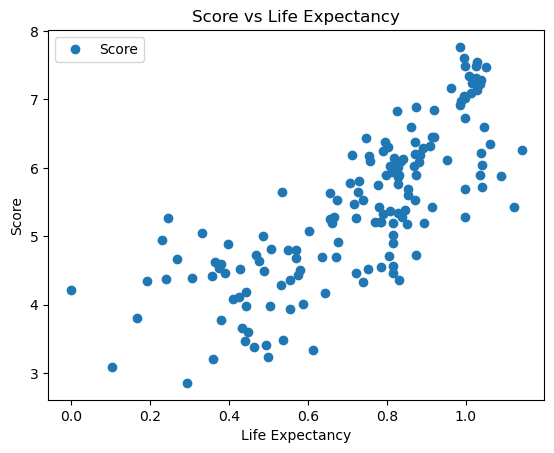

In [17]:
# Create Scatterplot Score vs Life Expectancy
happiness_subset.plot(x = 'Life Expectancy', y='Score',style='o')
plt.title('Score vs Life Expectancy')  
plt.xlabel('Life Expectancy')  
plt.ylabel('Score')  
plt.show()

Hypothesis: The higher the GDP per Capita the higher the happiness score.

5. Reshape Variables

In [19]:
X = happiness_subset['GDP Per Capita'].values.reshape(-1,1)
y = happiness_subset['Score'].values.reshape(-1,1)

In [20]:
X

array([[1.34 ],
       [1.383],
       [1.488],
       [1.38 ],
       [1.396],
       [1.452],
       [1.387],
       [1.303],
       [1.365],
       [1.376],
       [1.372],
       [1.034],
       [1.276],
       [1.609],
       [1.333],
       [1.499],
       [1.373],
       [1.356],
       [1.433],
       [1.269],
       [1.503],
       [1.3  ],
       [1.07 ],
       [1.324],
       [1.368],
       [1.159],
       [0.8  ],
       [1.403],
       [1.684],
       [1.286],
       [1.149],
       [1.004],
       [1.124],
       [1.572],
       [0.794],
       [1.294],
       [1.362],
       [1.246],
       [1.231],
       [1.206],
       [0.745],
       [1.238],
       [0.985],
       [1.258],
       [0.694],
       [0.882],
       [1.092],
       [1.162],
       [1.263],
       [0.912],
       [1.5  ],
       [1.05 ],
       [1.187],
       [1.301],
       [1.237],
       [0.831],
       [1.12 ],
       [1.327],
       [0.642],
       [1.173],
       [0.776],
       [1.201],
       [

In [21]:
y

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

6. Split Data into Training Set and Test Set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

7. Linear Regression

In [23]:
regression = LinearRegression()

In [24]:
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
y_predicted = regression.predict(X_test)

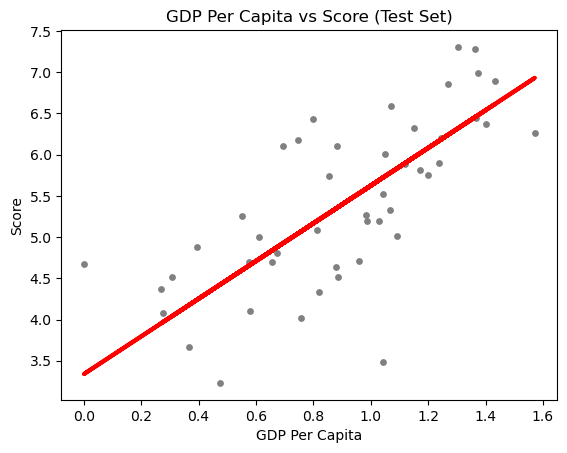

In [26]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP Per Capita vs Score (Test Set)')
plot_test.xlabel('GDP Per Capita')
plot_test.ylabel('Score')
plot_test.show()

The regression line appears to fit the data fairly accurately, but I might have expected it to have a slightly steeper slope.

8. MSE and R2 Score

In [27]:
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [29]:
print('Slope:' ,regression.coef_)
print('Mean Squared Error: ', mse)
print('R2 Score: ', r2)

Slope: [[2.28560657]]
Mean Squared Error:  0.5168179896793244
R2 Score:  0.4921825647047632


9. Compare Predicted & Actual y Values

In [30]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.436,5.167462
1,5.893,6.166272
2,6.198,6.186843
3,4.639,5.348025
4,6.446,6.465687
5,7.307,6.317122
6,6.100,5.354882
7,4.707,5.533159
8,4.107,4.660058
9,6.174,5.041754


10. Compare How Regression Fits Training Set

In [31]:
y_predicted_train = regression.predict(X_train)

In [32]:
mse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean Squared error: ', mse)
print('R2 Score: ', r2)

Slope: [[2.28560657]]
Mean Squared error:  0.42965385241536524
R2 Score:  0.6752547237794557


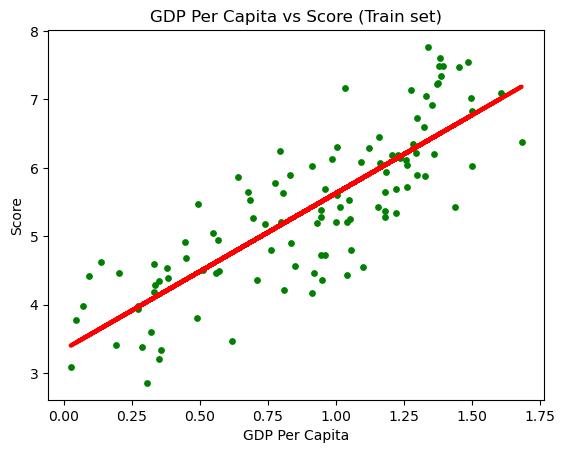

In [35]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP Per Capita vs Score (Train set)')
plot_test.xlabel('GDP Per Capita')
plot_test.ylabel('Score')
plot_test.show()

It appears that there is some variation between the actual and predicted values of y, so model is not that accurate. GDP per Capita certainly plays a role in the score, but it cannot be the only factor. I do believe that it is a significant factor.